# CIFAR10 Multi-Class Image Classification

- Keras notes https://keras.io/api/datasets/cifar10/
- CIFAR dataset details https://www.cs.toronto.edu/~kriz/cifar.html
- How to process your own images with Keras https://keras.io/api/preprocessing/image/

In [37]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from keras.datasets import cifar10
from tensorflow import keras
from keras.layers import Conv2D

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
# from keras.optimizers import SGD

import matplotlib.pyplot as plt

In [38]:
# Already pre-processed vectorized, already split data

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [39]:
# What are the dimensions of our tensor look like?
# 50,000 images
# 32 by 32 pixels
# 3 color channels for RGB
x_train.shape

(50000, 32, 32, 3)

In [40]:
# Model parameters
num_classes = 10

input_shape = (32, 32, 3, 1)

## Target Variable Classes

| Label | Description |
| ----- | ----------- |
| 0     | airplane    |
| 1     | automobile  |
| 2     | bird        |
| 3     | cat         |
| 4     | deer        |
| 5     | dog         |
| 6     | frog        |
| 7     | horse       |
| 8     | ship        |
| 9     | truck       |

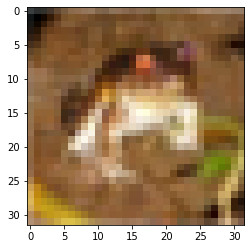

Train label: [6]


In [41]:
digit = x_train[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print("Train label:", y_train[0])

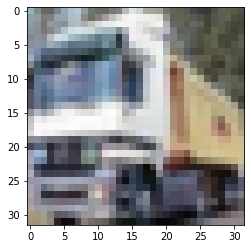

Train label: [9]


In [42]:
digit = x_train[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print("Train label:", y_train[1])

In [43]:
# Scale images to the [0, 1] range. 
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [44]:
# Make sure images have shape (32, 32, 3, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3, 1)
50000 train samples
10000 test samples


In [45]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [47]:
# example of a 3-block vgg style architecture
model = keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

In [33]:
# # Build the model
# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation="softmax"),
#     ]
# )

# model.summary()

ValueError: Input 0 of layer "max_pooling2d_4" is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, 32, 30, 1, 32)

In [ ]:
batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)